In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os
import pickle as pkl

from PIL import Image
from skimage.io import imread

import warnings
warnings.filterwarnings('ignore')

In [2]:
os.cpu_count()

12

In [5]:
train_data = np.load('E:Work/kcl/Scalogram_ali/25sec_5shift/dic/train/Train_data.npy')
train_labels = np.load('E:Work/kcl/Scalogram_ali/25sec_5shift/dic/train/Train_label.npy')

In [3]:
val_data = np.load('E:Work/kcl/Scalogram_ali/25sec_5shift/dic/val/Val_data.npy')
val_labels = np.load('E:Work/kcl/Scalogram_ali/25sec_5shift/dic/val/Val_label.npy')

In [4]:
plt.ioff()

1.0


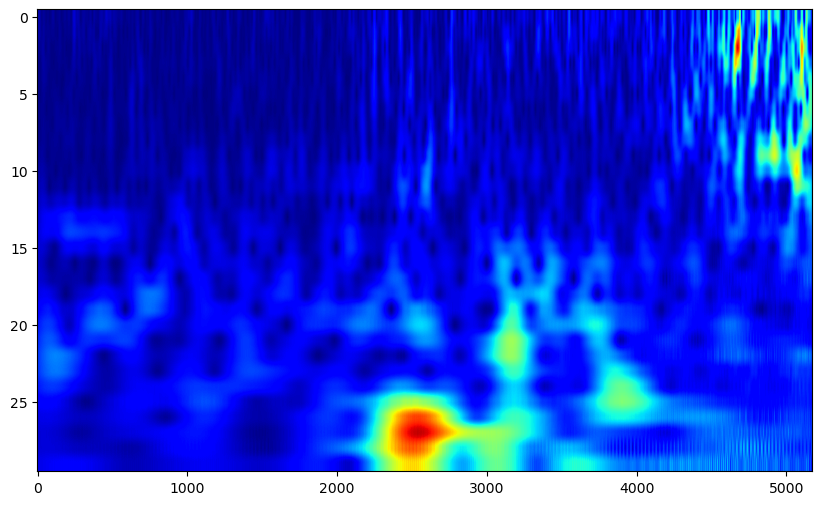

In [26]:
for i in range(0, 1):
    print(train_labels[i])
    plt.figure(figsize=(10, 6))
    im = plt.imshow(train_data[i,:,:,0], #extent=[0, 25, 1, 30], 
                    aspect='auto', cmap='jet')
    #plt.axis('off')
    plt.show()

1.0


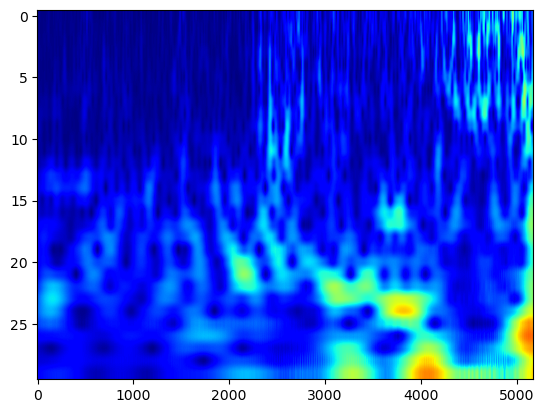

In [28]:
for i in range(0, 1):
    print(train_labels[i])
    #plt.figure(figsize=(10, 6))
    im = plt.imshow(train_data[i,:,:,1], #extent=[0, 25, 1, 30], 
                    aspect='auto', cmap='jet')
    #plt.axis('off')
    plt.show()

In [8]:
def save_fig(data, epoch, channel, post):
    fig, ax = plt.subplots()
    im = ax.imshow(data, #extent=[0, 25, 1, 30], 
                    aspect='auto', cmap='jet')
    ax.axis('off')
    fig.tight_layout()
    if post:
        fig.savefig(f'E:/Work/kcl/Scalogram_ali/25sec_5shift/train_images/post/epoch_{epoch}_channel_{channel}_post.png')
        plt.close(fig)
    else:
        fig.savefig(f'E:/Work/kcl/Scalogram_ali/25sec_5shift/train_images/bkg/epoch_{epoch}_channel_{channel}_bkg.png')
        plt.close(fig)

In [ ]:
for i in range(len(train_data)):
    post = train_labels[i]
    save_fig(train_data[i, :, :, 0], i, 0, post)
    save_fig(train_data[i, :, :, 1], i, 1, post)

In [6]:
def save_fig_val(data, epoch, channel, post):
    fig, ax = plt.subplots()
    im = ax.imshow(data, #extent=[0, 25, 1, 30], 
                    aspect='auto', cmap='jet')
    ax.axis('off')
    fig.tight_layout()
    if post:
        fig.savefig(f'E:/Work/kcl/Scalogram_ali/25sec_5shift/val_images/post/epoch_{epoch}_channel_{channel}_post.png')
        plt.close(fig)
    else:
        fig.savefig(f'E:/Work/kcl/Scalogram_ali/25sec_5shift/val_images/bkg/epoch_{epoch}_channel_{channel}_bkg.png')
        plt.close(fig)

# Multithreading

In [7]:
import concurrent.futures

In [9]:
with concurrent.futures.ThreadPoolExecutor(max_workers=8) as executor:
    for i in range(1536,len(train_data),1):
        post = train_labels[i]
        executor.submit(save_fig, train_data[i, :, :, 0], i, 0, post)
        executor.submit(save_fig, train_data[i, :, :, 1], i, 1, post)

# Only need to do val data now

In [9]:
with concurrent.futures.ThreadPoolExecutor(max_workers=8) as executor:
    for i in range(len(val_data)):
        post = val_labels[i]
        executor.submit(save_fig_val, val_data[i, :, :, 0], i, 0, post)
        executor.submit(save_fig_val, val_data[i, :, :, 1], i, 1, post)